# Plotting of GMAP results

This notebook shows how to do a fit with the `gmapi` package and plot some results afterwards.


## Load necessary libraries

In [1]:
import numpy as np
import pandas as pd
from numpy.random import default_rng
import matplotlib.pyplot as plt
from gmapi.gmap import run_gmap
from gmapi.mappings.compound_map import CompoundMap
dbfile = '../tests/testdata/data-2017-07-26.gma'

## Perform the fit

In [2]:
%%capture
res = run_gmap(dbfile, dbtype='legacy', num_iter=3, fix_ppp_bug=True, fix_sacs_jacobian=True, legacy_output=False)

## Examine the result data

The dictionary returned by `run_gmap` contains a `table` field, which contains a dataframe with the information to be plotted. Let's have a look at this dataframe:

In [3]:
resdf = res['table']
resdf[(resdf.ENERGY > 0) & (resdf.ENERGY < 0.001) & (resdf.REAC == 'MT:1-R1:1')]

,NODE,REAC,ENERGY,PRIOR,DESCR,POST,POSTUNC,RELPOSTUNC
0,xsid_1,MT:1-R1:1,2.530000e-08,938.100,"6Li(n,a)",938.131177,0.544431,0.000580
1,xsid_1,MT:1-R1:1,9.400000e-06,48.640,"6Li(n,a)",48.639696,0.028207,0.000580
2,xsid_1,MT:1-R1:1,1.500000e-04,12.160,"6Li(n,a)",12.160772,0.004038,0.000332
3,xsid_1,MT:1-R1:1,2.500000e-04,9.413,"6Li(n,a)",9.413054,0.003676,0.000391
4,xsid_1,MT:1-R1:1,3.500000e-04,7.954,"6Li(n,a)",7.951949,0.003027,0.000381
5,xsid_1,MT:1-R1:1,4.500000e-04,7.012,"6Li(n,a)",7.010730,0.002533,0.000361
6,xsid_1,MT:1-R1:1,5.500000e-04,6.341,"6Li(n,a)",6.340275,0.001921,0.000303
7,xsid_1,MT:1-R1:1,6.500000e-04,5.832,"6Li(n,a)",5.830441,0.001880,0.000323
8,xsid_1,MT:1-R1:1,7.500000e-04,5.428,"6Li(n,a)",5.427131,0.001486,0.000274
9,xsid_1,MT:1-R1:1,8.500000e-04,5.098,"6Li(n,a)",5.096999,0.001346,0.000264


Prepare the experimental data table

In [4]:
expdf = res['exptable']
expcov = res['expcov']
expdf['UNC'] = np.sqrt(res['expcov'].diagonal())
expdf['RELUNC'] = expdf['UNC'] / expdf['DATA']
pd.set_option("display.max_rows", 50)
expdf[expdf['REAC'] == 'MT:1-R1:1'].sort_values(by='ENERGY')

,NODE,REAC,ENERGY,DATA,DB_IDX,DS_IDX,UNC,RELUNC
3575,exp_900,MT:1-R1:1,2.530000e-08,938.131177,107,0,568.711802,0.606218
6928,exp_2001,MT:1-R1:1,2.530000e-08,938.525000,217,1,0.562879,0.000600
6929,exp_2001,MT:1-R1:1,9.400000e-06,48.660000,217,1,0.029184,0.000600
3576,exp_900,MT:1-R1:1,9.400000e-06,48.639696,107,0,29.486248,0.606218
3577,exp_900,MT:1-R1:1,1.500000e-04,12.160772,107,0,7.372076,0.606218
...,...,...,...,...,...,...,...,...
3652,exp_900,MT:1-R1:1,2.400000e+00,0.213566,107,0,0.129467,0.606218
7006,exp_2001,MT:1-R1:1,2.600000e+00,0.188200,217,1,0.010303,0.054743
3653,exp_900,MT:1-R1:1,2.600000e+00,0.200636,107,0,0.121629,0.606218
3654,exp_900,MT:1-R1:1,2.800000e+00,0.184309,107,0,0.111731,0.606218


We remove the dummy datapoints which only act as a regularizer and have huge uncertainties---not useful for plotting

In [5]:
expdf = expdf.loc[~(expdf['NODE'].str.match('exp_90'))].copy()
expdf[(expdf.REAC == 'MT:1-R1:1') & (expdf.ENERGY > 0.) & (expdf.ENERGY < 0.001)]

,NODE,REAC,ENERGY,DATA,DB_IDX,DS_IDX,UNC,RELUNC
6928,exp_2001,MT:1-R1:1,2.530000e-08,938.5250,217,1,0.562879,0.00060
6929,exp_2001,MT:1-R1:1,9.400000e-06,48.6600,217,1,0.029184,0.00060
6930,exp_2001,MT:1-R1:1,1.500000e-04,12.1630,217,1,0.004135,0.00034
6931,exp_2001,MT:1-R1:1,2.500000e-04,9.4150,217,1,0.003765,0.00040
6932,exp_2001,MT:1-R1:1,3.500000e-04,7.9535,217,1,0.003101,0.00039
6933,exp_2001,MT:1-R1:1,4.500000e-04,7.0120,217,1,0.002594,0.00037
6934,exp_2001,MT:1-R1:1,5.500000e-04,6.3412,217,1,0.001965,0.00031
6935,exp_2001,MT:1-R1:1,6.500000e-04,5.8313,217,1,0.001924,0.00033
6936,exp_2001,MT:1-R1:1,7.500000e-04,5.4278,217,1,0.001520,0.00028
6937,exp_2001,MT:1-R1:1,8.500000e-04,5.0976,217,1,0.001376,0.00027


## Plot the result data

<IPython.core.display.Javascript object>


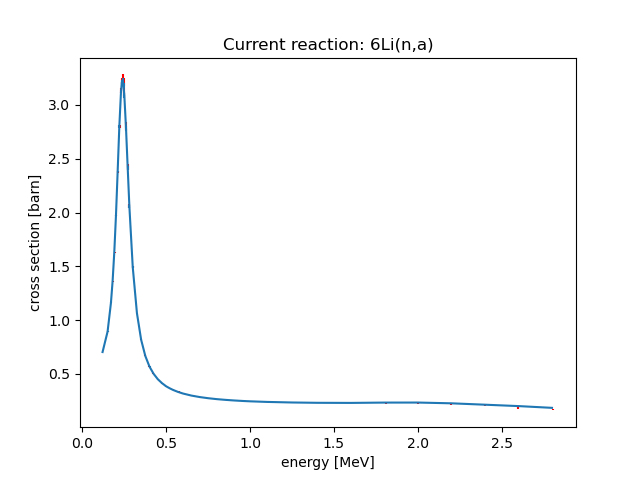

In [6]:
%matplotlib notebook
# add the experimental data
curexpdf = expdf[(expdf['REAC'] == 'MT:1-R1:1') & (expdf['ENERGY'] > 0.1)]
exp_x = curexpdf['ENERGY'].to_numpy()
rng = default_rng()
exp_x = [rng.uniform(x*0.99, x*1.01, 1) for x in exp_x]
exp_y = curexpdf['DATA']
exp_unc = curexpdf['UNC']
plt.errorbar(exp_x, exp_y, yerr=exp_unc, fmt='none', ecolor='red')
# plot the evaluated curve
curdf = resdf[np.logical_and(resdf['REAC'] == 'MT:1-R1:1', resdf['ENERGY'] > 0.1)]
xvals = curdf['ENERGY']
yvals = curdf['POST']
uncs = curdf['POSTUNC']
plt.title(f'Current reaction: {resdf["DESCR"].iloc[0]}')
plt.xlabel('energy [MeV]')
plt.ylabel('cross section [barn]')
plt.errorbar(xvals, yvals, yerr=uncs)
plt.show()